Proportional hazard regression models (“Cox models”) are a regression technique for censored data. They allow variation in the time to an event to be explained in terms of covariates, similar to what is done in a linear or generalized linear regression model. These models express the covariate effects in terms of “hazard ratios”, meaning the the hazard (instantaneous event rate) is multiplied by a given factor depending on the value of the covariates.

比例风险回归模型（“ Cox模型”）是用于审查数据的回归技术。它们使事件发生时间的变化可以用协变量来解释，类似于在线性或广义线性回归模型中所做的事情。这些模型用“风险比”表示协变量效应，这意味着根据协变量的值，将危害（瞬时事件发生率）乘以给定因子。

In [10]:
%matplotlib inline

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset("flchain", "survival").data
data

,age,sex,sample.yr,kappa,lambda,flc.grp,creatinine,mgus,futime,death,chapter
0,97,F,1997,5.700,4.860,10,1.7,0,85,1,Circulatory
1,92,F,2000,0.870,0.683,1,0.9,0,1281,1,Neoplasms
2,94,F,1997,4.360,3.850,10,1.4,0,69,1,Circulatory
3,92,F,1996,2.420,2.220,9,1.0,0,115,1,Circulatory
4,93,F,1996,1.320,1.690,6,1.1,0,1039,1,Circulatory
5,90,F,1997,2.010,1.860,9,1.0,0,1355,1,Mental
6,90,F,1996,0.430,0.880,1,0.8,0,2851,1,Mental
7,90,F,1999,2.470,2.700,10,1.2,0,372,1,Nervous
8,93,F,1996,1.910,2.180,9,1.2,0,3309,1,Respiratory
9,91,F,1996,0.791,2.220,6,0.8,0,1326,1,Circulatory


In [1]:
del data["chapter"]
data = data.dropna()
data["lam"] = data["lambda"]
data["female"] = (data["sex"] == "F").astype(int)
data["year"] = data["sample.yr"] - min(data["sample.yr"])
status = data["death"].values

mod = smf.phreg("futime ~ 0 + age + female + creatinine + "
                "np.sqrt(kappa) + np.sqrt(lam) + year + mgus",
                data, status=status, ties="efron")
rslt = mod.fit()
print(rslt.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\duration\hazard_regression.py:409: UserWarning: PHReg formulas should not include any '0' or '1' terms
  warnings.warn("PHReg formulas should not include any '0' or '1' terms")


                           Results: PHReg
Model:                      PH Reg         Sample size:         6524
Dependent variable:         futime         Num. events:         1962
Ties:                       Efron                                   
--------------------------------------------------------------------
                log HR log HR SE   HR      t    P>|t|  [0.025 0.975]
--------------------------------------------------------------------
age             0.1012    0.0025 1.1065 40.9289 0.0000 1.1012 1.1119
female         -0.2817    0.0474 0.7545 -5.9368 0.0000 0.6875 0.8280
creatinine      0.0134    0.0411 1.0135  0.3271 0.7436 0.9351 1.0985
np.sqrt(kappa)  0.4047    0.1147 1.4988  3.5288 0.0004 1.1971 1.8766
np.sqrt(lam)    0.7046    0.1117 2.0230  6.3056 0.0000 1.6251 2.5183
year            0.0477    0.0192 1.0489  2.4902 0.0128 1.0102 1.0890
mgus            0.3160    0.2532 1.3717  1.2479 0.2121 0.8350 2.2532
Confidence intervals are for the hazard ratios


plot()

In [5]:
import statsmodels.api as sm

data = sm.datasets.get_rdataset("flchain", "survival").data
df = data.loc[data.sex == "F", :]
sf = sm.SurvfuncRight(df["futime"], df["death"])
sf.summary().head()

,Surv prob,Surv prob SE,num at risk,num events
Time,,,,
0,0.999310,0.000398,4350,3.0
1,0.998851,0.000514,4347,2.0
2,0.998621,0.000563,4343,1.0
3,0.997931,0.000689,4342,3.0
4,0.997471,0.000762,4338,2.0


In [8]:
sf.summary().tail()

,Surv prob,Surv prob SE,num at risk,num events
Time,,,,
4823,0.701510,0.007615,951,1.0
4891,0.700487,0.007673,686,1.0
4914,0.699280,0.007754,580,1.0
4928,0.697823,0.007873,480,1.0
4998,0.690844,0.010439,100,1.0


In [7]:
sf.quantile(0.25),sf.quantile_ci(0.25)

(3995, (3776, 4166))

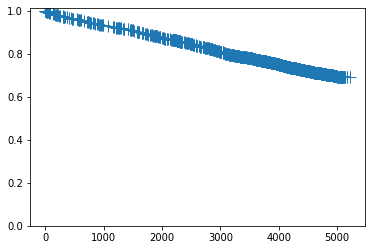

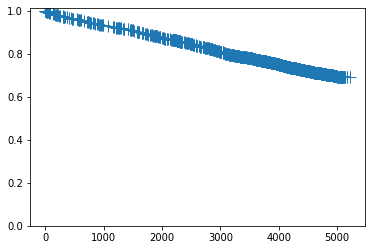

In [12]:
sf.plot()

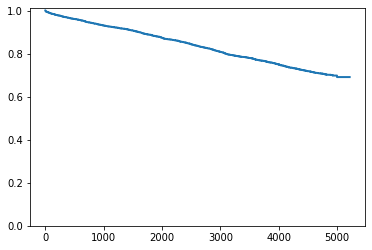

In [13]:
fig = sf.plot()
ax = fig.get_axes()[0]
pt = ax.get_lines()[1]
pt.set_visible(False)

Text(0.5, 0, 'Days since enrollment')

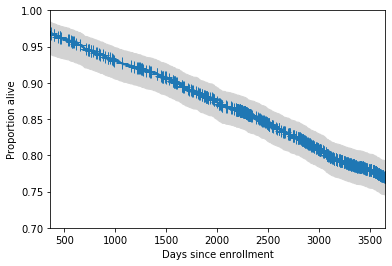

In [14]:
fig = sf.plot()
lcb, ucb = sf.simultaneous_cb()
ax = fig.get_axes()[0]
ax.fill_between(sf.surv_times, lcb, ucb, color='lightgrey')
ax.set_xlim(365, 365*10)
ax.set_ylim(0.7, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")